In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from rubin_sim.maf import radar
import os

from matplotlib.legend_handler import HandlerErrorbar

In [2]:
def norm_df(
    df,
    runs,
    cols,
    norm_run="baseline",
    invert_cols=None,
    reverse_cols=None,
    run_label="run_name",
    mag_cols=[],
):
    """
    Normalize values in a dataframe to a given run
    Parameters
    ----------
    df : pandas.DataFrame
        The input data frame
    runs : list of str
        A list of run numes
    cols : list of str
        A list of columns in df to use
    norm_run : str
        The row to use to normalize things to
    invert_cols : list of str
        A list of column names that should be inverted (e.g., columns that
        are uncertainties and are better with a smaller value)
    reverse_cols : list of str
        Columns to reverse (e.g., magnitudes)
    run_label : str (run_name)
        The column that has run names
    mag_cols : list of str
        Columns that are in magnitudes
    """
    indices = [np.max(np.where(df.index == name)[0]) for name in runs]
    out_df = df[cols].iloc[indices].copy()
    if reverse_cols is not None:
        for colname in reverse_cols:
            out_df[colname] = -out_df[colname]
    if invert_cols is not None:
        for colname in invert_cols:
            out_df[colname] = 1.0 / out_df[colname]
    if norm_run is not None:
        indx = np.max(np.where(out_df.index == norm_run)[0])
        for col in out_df.columns:
            # maybe just check that it's not a
            if col != "run_name":
                if (col in mag_cols) | (mag_cols == "all"):
                    out_df[col] = 1.0 + (out_df[col] - out_df[col].iloc[indx])
                else:
                    out_df[col] = (
                        1.0
                        + (out_df[col] - out_df[col].iloc[indx])
                        / out_df[col].iloc[indx]
                    )
    return out_df

In [3]:
data_loaded = pd.read_hdf('summary.h5')

In [4]:
# Pull out the metrics we are interested in and define simple names

name_dict = {
            'Total detected KNePopMetric_all_ztfrest_simple all models UserPointsSlicer': 'KNe ZTF simple',
            'Total detected KNePopMetric_single_ztfrest_simple single model UserPointsSlicer': 'KNe single model',
            'Sum PrestoKNe_score_p UserPointsSlicer': 'KNe Score, P',
            'Sum PrestoKNe_score_s UserPointsSlicer': 'KNe Score, S',
            'Sum ColorSlope visitExposureTime > 19 HealpixSlicer': 'color slope',
            "Sum ColorSlope2Night visitExposureTime > 19 HealpixSlicer": "2day\ncolor slope",
            }
            
# drop in the units for the columns
units = {'parallax best 18k': 'mas',
         'proper motion best 18k': 'mas/yr',
         '20-30d microlensing\ndetection': 'fraction', 
         '60-90d microlensing\ndetection': 'fraction', 
         'fO N vis' : '', 
         'SNe, N': '', 
         'SNe, zlim': '', 
         '3x2 i-band': 'score', 
         'WL Nvis \ni-band': '', 
         'KNe ZTF simple': 'N', 
         'KNe single model': 'N',
         'KNe Score, P': 'score',
         'XRB\nearly detect': 'N', 
         'Brown Dwarf Vol': 'pc^3', 
         'NEO bright': 'fraction', 
         'NEO faint': 'fraction', 
         'TNO': 'fraction', 
         'MBA':'fraction',
         'Trojan': 'fraction',
         'Vatira': 'fraction',
         'PHA, quad': 'fraction',
         'Y1,u': '',
         'Y1,g': '',
         'Y1,r': '',
         'Y1,i': '',
         'color slope': 'N',
         '2day\ncolor slope': 'N',
        }

# If columns are uncertainties, we want to plot them backwards
invert_cols = ['parallax best 18k', 'proper motion best 18k']
# If columns are mags or fractions, we want to plot differences, not fractional differences.
mag_cols = ['20-30d microlensing\ndetection', '60-90d microlensing\ndetection','SNe, zlim',
            'NEO bright', 'NEO faint', 'TNO', 'Vatira', 'MBA', 'Trojan',
           'u', 'g', 'r', 'i', 'z', 'y']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = data_loaded[key]
    

mag_dict = {'Median CoaddM5 g HealpixSlicer': 'g',
 'Median CoaddM5 i HealpixSlicer': 'i',
 'Median CoaddM5 r HealpixSlicer': 'r',
 'Median CoaddM5 u HealpixSlicer': 'u',
 'Median CoaddM5 y HealpixSlicer': 'y',
 'Median CoaddM5 z HealpixSlicer': 'z'}

mag_data = pd.DataFrame()
for key in mag_dict:
    mag_data[mag_dict[key]] = data_loaded[key]
    
    
    
ddf_dict = {'Sum SNNSNMetric DD:COSMOS_reducen_sn DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN COSMOS',
           'Sum SNNSNMetric DD:ECDFS_reducen_sn DD:ECDFS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN ECDFS',
           'Sum SNNSNMetric DD:EDFS_reducen_sn DD:EDFS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN EDFS',
           'Sum SNNSNMetric DD:ELAISS1_reducen_sn DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer' : 'N SN ELAISS1',
           'Sum SNNSNMetric DD:XMM_LSS_reducen_sn DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN XMM_LSS',
            
           'Median SNNSNMetric DD:COSMOS_reducezlim DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer': 'zlim COSMOS',
            'Median SNNSNMetric DD:ECDFS_reducezlim DD:ECDFS all bands, only DDF observations HealpixSubsetSlicer': 'zlim ECDFS',
            'Median SNNSNMetric DD:EDFS_reducezlim DD:EDFS all bands, only DDF observations HealpixSubsetSlicer': 'zlim EDFS',
            'Median SNNSNMetric DD:ELAISS1_reducezlim DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer': 'zlim ELAISS1',
            'Median SNNSNMetric DD:XMM_LSS_reducezlim DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer': 'zlim XMM_LSS',
            
           'Total detected KNePopMetric_DD:COSMOS_ztfrest_simple DD:COSMOS UserPointsSlicer': 'Kne COSMOS',
         'Total detected KNePopMetric_DD:ECDFS_ztfrest_simple DD:ECDFS UserPointsSlicer': 'Kne ECDFS',
 'Total detected KNePopMetric_DD:EDFS_ztfrest_simple DD:EDFS UserPointsSlicer': 'Kne EDFS',
 'Total detected KNePopMetric_DD:ELAISS1_ztfrest_simple DD:ELAISS1 UserPointsSlicer': 'Kne ELAISS1',
 'Total detected KNePopMetric_DD:WFD_ztfrest_simple DD:WFD UserPointsSlicer': 'Kne WFD',
 'Total detected KNePopMetric_DD:XMM_LSS_ztfrest_simple DD:XMM_LSS UserPointsSlicer': 'Kne XMM_LSS',
            
            'Median DD:COSMOS NVisits all bands HealpixSubsetSlicer':'N COSMOS',
 'Median DD:ECDFS NVisits all bands HealpixSubsetSlicer': 'N ECDFS',
 'Median DD:EDFS NVisits all bands HealpixSubsetSlicer': 'N EDFS',
 'Median DD:ELAISS1 NVisits all bands HealpixSubsetSlicer': 'N ELAISS1',
 'Median DD:WFD NVisits all bands HealpixSubsetSlicer': 'N WFD',
 'Median DD:XMM_LSS NVisits all bands HealpixSubsetSlicer': 'N XMM_LSS', 
           }

ddf_data = pd.DataFrame()
for key in ddf_dict:
    ddf_data[ddf_dict[key]] = data_loaded[key]
 
gaps_dict = {}
for filtername in 'ugrizy':
    for times in [3,7,24]:
        gaps_dict['Mean N gaps in %s at %ihr in top 18k Gaps_%ihr %s band HealpixSlicer'% (filtername, times, times, filtername)] = 'gaps %s %i' % (filtername, times)
        #gaps_dict['Mean Gaps_%ihr %s band HealpixSlicer' % (times, filtername)] = 'gaps %s %i' % (filtername, times)
        
gaps_data = pd.DataFrame()
for key in gaps_dict:
    gaps_data[gaps_dict[key]] = data_loaded[key]

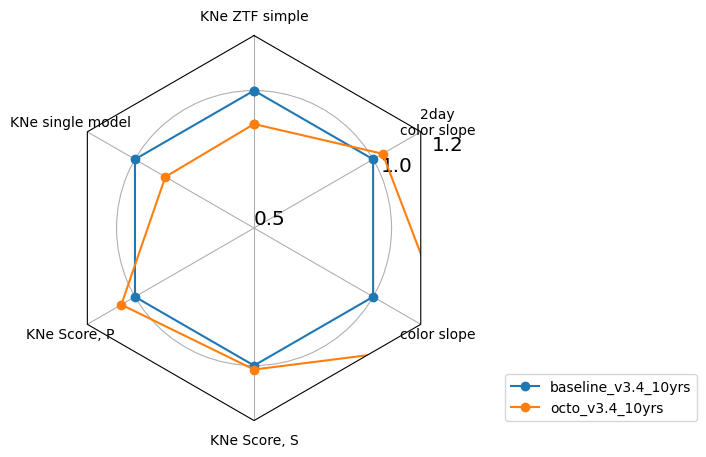

In [5]:
runs = ['baseline_v3.4_10yrs'] + [run for run in data.index  if 'octo' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=None, mag_cols = mag_cols, norm_run='baseline_v3.4_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

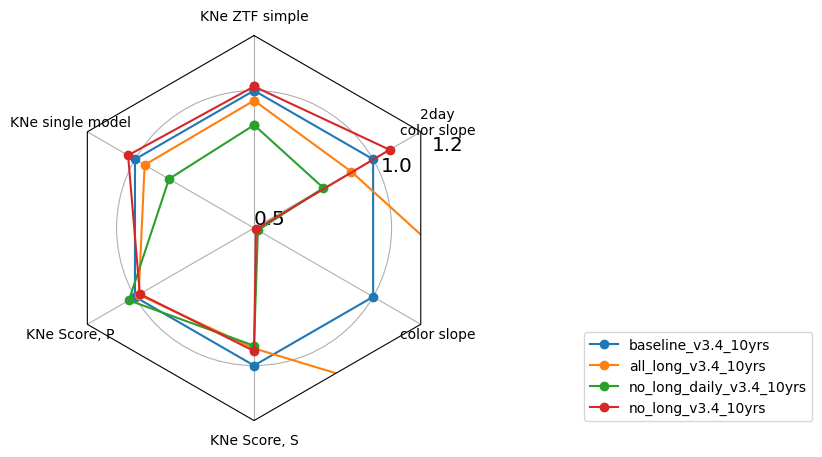

In [6]:
runs = ['baseline_v3.4_10yrs'] + [run for run in data.index if 'long' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=None, mag_cols = mag_cols, norm_run='baseline_v3.4_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(1.95, 0))

In [7]:
ndata

,KNe ZTF simple,KNe single model,"KNe Score, P","KNe Score, S",color slope,2day\ncolor slope
baseline_v3.4_10yrs,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
all_long_v3.4_10yrs,0.963751,0.959383,0.984338,0.937500,2.345381,0.909168
no_long_daily_v3.4_10yrs,0.874704,0.857101,1.025664,0.927885,0.516196,0.791419
no_long_v3.4_10yrs,1.014972,1.028906,0.979617,0.947115,0.508305,1.069437


In [8]:
data.index

Index(['all_long_v3.4_10yrs', 'baseline_v2.0_10yrs', 'baseline_v2.1_10yrs',
       'baseline_v2.2_10yrs', 'baseline_v3.0_10yrs', 'baseline_v3.2_10yrs',
       'baseline_v3.3_10yrs', 'baseline_v3.4_10yrs',
       'ddf_acor_sf10_lsf15_lsr10_v3.4_10yrs',
       'ddf_acor_sf10_lsf15_lsr20_v3.4_10yrs',
       ...
       'weather_cloudso1v3.4_10yrs', 'weather_cloudso20v3.4_10yrs',
       'weather_cloudso2v3.4_10yrs', 'weather_cloudso30v3.4_10yrs',
       'weather_cloudso31v3.4_10yrs', 'weather_cloudso35v3.4_10yrs',
       'weather_cloudso36v3.4_10yrs', 'weather_cloudso4v3.4_10yrs',
       'weather_cloudso6v3.4_10yrs', 'weather_cloudso8v3.4_10yrs'],
      dtype='object', length=246)

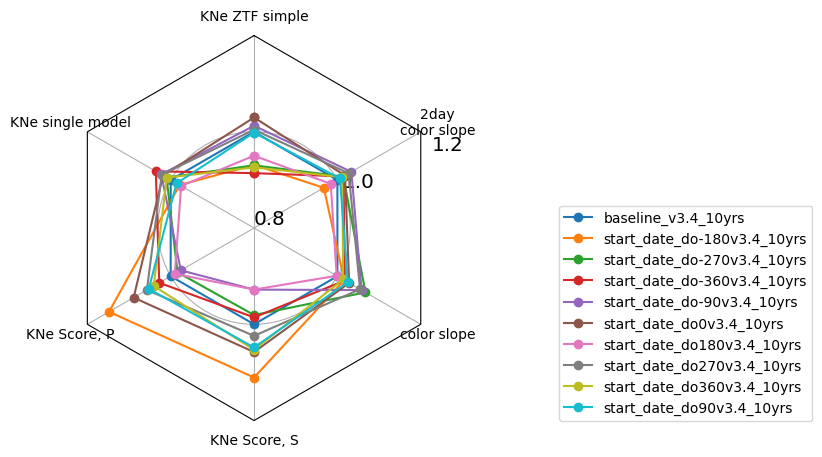

In [9]:
runs = ['baseline_v3.4_10yrs'] + [run for run in data.index if 'start' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=None, mag_cols = mag_cols, norm_run='baseline_v3.4_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.95, 0))

In [10]:
ndata

,KNe ZTF simple,KNe single model,"KNe Score, P","KNe Score, S",color slope,2day\ncolor slope
baseline_v3.4_10yrs,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
start_date_do-180v3.4_10yrs,0.931245,0.978654,1.147925,1.110577,1.016157,0.967328
start_date_do-270v3.4_10yrs,0.930260,1.009932,0.983646,0.980769,1.067330,1.014046
start_date_do-360v3.4_10yrs,0.914106,1.035725,1.027451,0.985577,1.017894,1.014580
start_date_do-90v3.4_10yrs,1.012608,1.022680,0.975669,0.927885,1.057844,1.033536
start_date_do0v3.4_10yrs,1.029748,1.018381,1.088944,1.057692,1.028144,1.018227
start_date_do180v3.4_10yrs,0.950355,0.974948,0.990115,0.927885,0.998297,0.984010
start_date_do270v3.4_10yrs,1.004334,1.021494,1.057142,1.024038,1.054318,1.027189
start_date_do360v3.4_10yrs,0.926123,1.009487,1.040774,1.052885,1.013772,1.011648
start_date_do90v3.4_10yrs,0.998227,0.985918,1.052661,1.048077,1.024834,1.006083


Do I understand why the color slope goes down here? triples should be the same as the baseline.

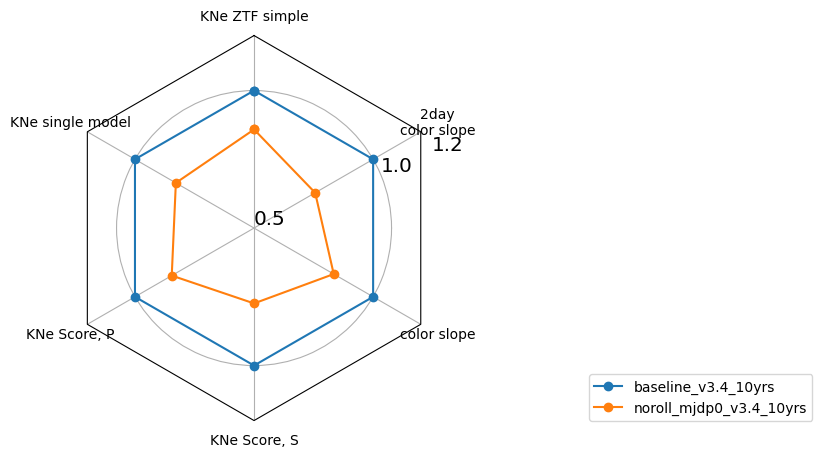

In [11]:
runs = ['baseline_v3.4_10yrs'] + [run for run in data.index if 'noroll_mjdp0' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=None, mag_cols = mag_cols, norm_run='baseline_v3.4_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(1.95, 0))

In [12]:
ndata

,KNe ZTF simple,KNe single model,"KNe Score, P","KNe Score, S",color slope,2day\ncolor slope
baseline_v3.4_10yrs,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000
noroll_mjdp0_v3.4_10yrs,0.85855,0.828343,0.845594,0.774038,0.834539,0.75665


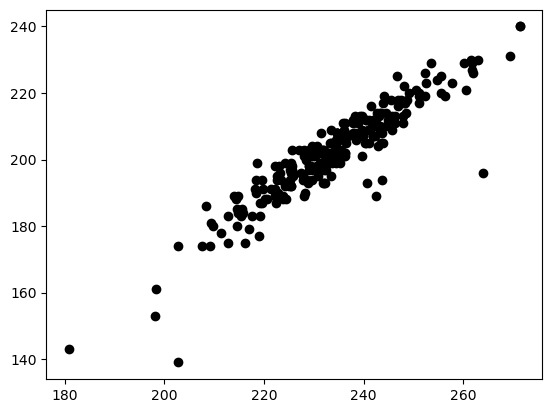

In [13]:
# Score P and S seem to be pretty well correlated
plt.plot(data['KNe Score, P'], data['KNe Score, S'], 'ko')

Text(0, 0.5, 'ZTF single model')

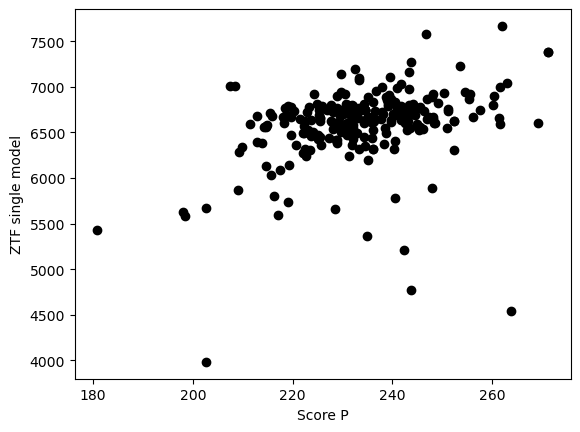

In [14]:
plt.plot(data['KNe Score, P'], data['KNe single model'], 'ko')
plt.xlabel('Score P')
plt.ylabel('ZTF single model')

In [15]:
data.index[data['KNe single model'] < 1000]

Index([], dtype='object')